In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

# Upload your CSV from your computer
uploaded = files.upload()


Saving sleep.csv to sleep.csv


In [7]:
# Assuming your file name is 'sleep.csv'
df = pd.read_csv('sleep.csv')

# Quick overview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
# Split BP into numeric columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

# Drop unnecessary columns
df = df.drop(['Blood Pressure', 'Person ID'], axis=1)


In [9]:
# Fill missing Sleep Disorder values with 'No Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

# Verify
df.isnull().sum()


,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


In [10]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,126,83,True,...,False,False,False,True,False,False,False,True,True,False
1,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,4,30,8,85,3000,140,90,True,...,True,False,False,False,False,False,True,False,False,True
4,28,5.9,4,30,8,85,3000,140,90,True,...,True,False,False,False,False,False,True,False,False,True


In [11]:
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [12]:
# Predict Sleep Disorder (1 if Sleep Apnea, else 0)
X = df_encoded.drop('Sleep Disorder_Sleep Apnea', axis=1)
y = df_encoded['Sleep Disorder_Sleep Apnea']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9066666666666666

Confusion Matrix:
 [[57  2]
 [ 5 11]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94        59
        True       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75



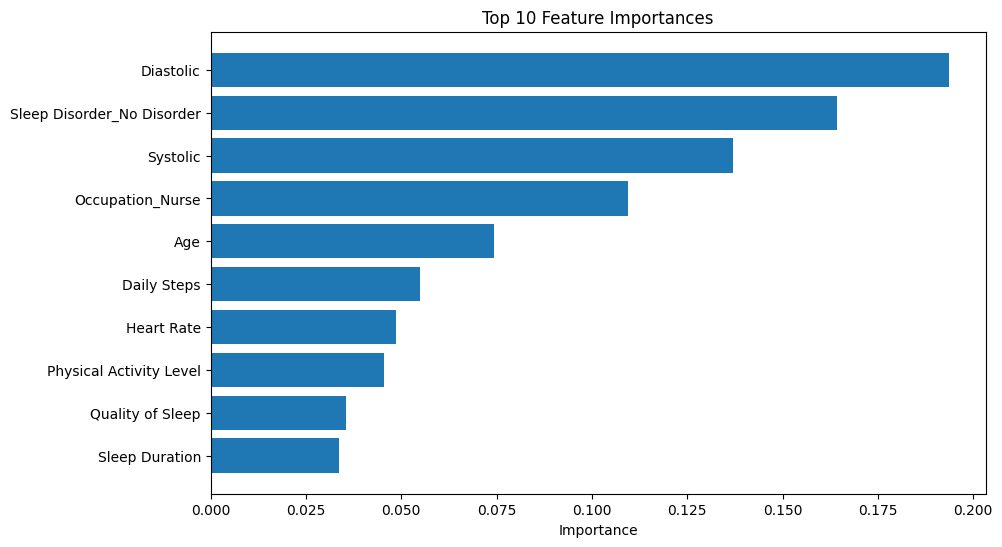

In [15]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()
